# Predicting Flight Delays

---

In [12]:
# General Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# R1.1 Imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, precision_recall_curve

#R1.2 Imports
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

#R1.3 Imports


## Data Preperation

Little data preperation is needed for these models as the initial cleaning is perfect for the needs. There will just be different subsets for each.


In [13]:
df = pd.read_csv("../data/ORD_11_21-11-22_model.csv")

In [14]:
# test = True # this is a temporary flag so it can run quickly
# if test:
#     df = df.iloc[0:1001]

## Logistic Regression (2 Classes)

In [15]:
# Two class subset
df_x = df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DepDelay', 'DestAirportSeqID', 'ArrTimeBlk', 'ArrDelay', 'Distance',
                  'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TaxiIn', 'TaxiOut']]
df_y = df['DepDel15']

In [16]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=.25)


In [17]:
# fit = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight={0:15, 1:85}, random_state=15).fit(x_train, y_train)
fit = LogisticRegression(solver='lbfgs', max_iter=10000).fit(x_train, y_train)

In [18]:
y_pred = fit.predict(x_test)
y_prob = fit.predict_proba(x_test)
y_prob = y_prob[:,1] # want the positive values

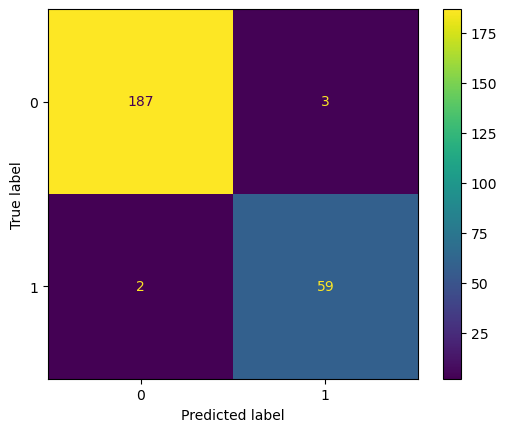

In [19]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot()

In [20]:
print(f"Accuracy of Model: {accuracy_score(y_test, y_pred)}")
print(f"Precision of Model: {precision_score(y_test, y_pred)}")
print(f"Recall of Model: {recall_score(y_test, y_pred)}")

Accuracy of Model: 0.9800796812749004
Precision of Model: 0.9516129032258065
Recall of Model: 0.9672131147540983


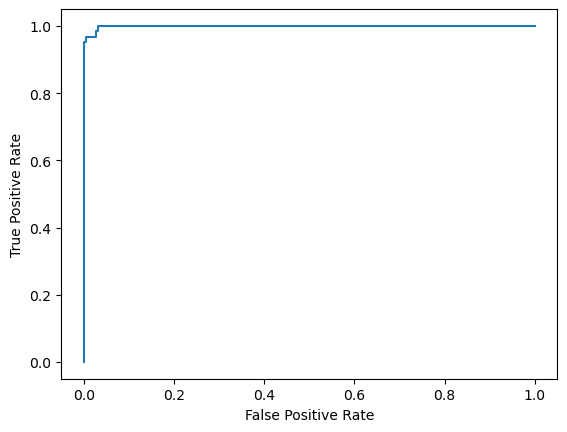

In [21]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

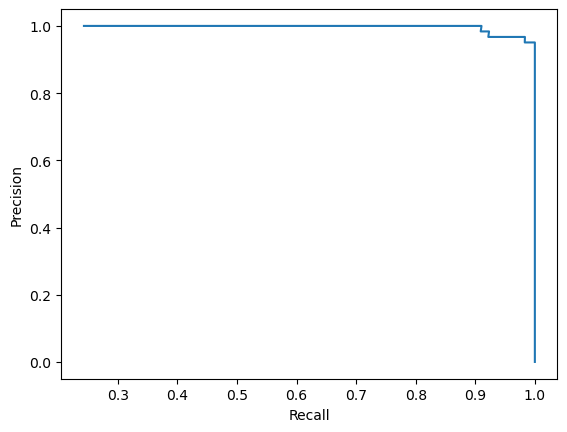

In [22]:
prec, recall, _ = precision_recall_curve(y_test, y_prob)

plt.plot(prec,recall)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## Logistic Regression (Multiple Classes)

In [23]:
# Multi class subset **overwriting variables**
df_x= df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DepDelay', 'DestAirportSeqID', 'ArrTimeBlk', 'ArrDelay', 'Distance',
                  'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TaxiIn', 'TaxiOut']]
df_y= df['ArrivalDelayGroups']

In [24]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=.25)

In [25]:
# fit = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight={0:15, 1:85}, random_state=15).fit(x_train, y_train)
fit = LogisticRegression(solver='lbfgs', max_iter=10000).fit(x_train, y_train)

/home/atramirez/anaconda3/envs/dat494/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
y_pred = fit.predict(x_test)
y_prob = fit.predict_proba(x_test)
y_prob = y_prob[:,1] # want the positive values

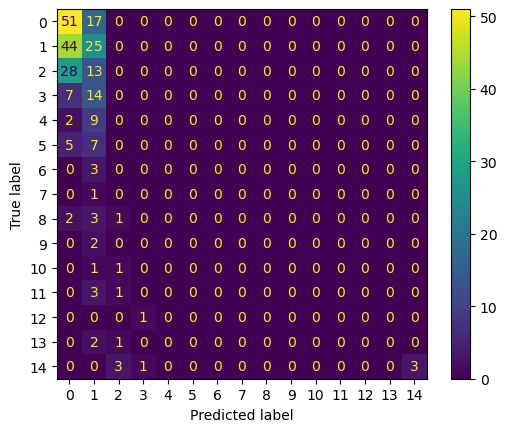

In [27]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot()

In [28]:
print(f"Accuracy of Model: {accuracy_score(y_test, y_pred)}")

Accuracy of Model: 0.3147410358565737


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -2.0       0.37      0.75      0.49        68
        -1.0       0.25      0.36      0.30        69
         0.0       0.00      0.00      0.00        41
         1.0       0.00      0.00      0.00        21
         2.0       0.00      0.00      0.00        11
         3.0       0.00      0.00      0.00        12
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         6
         7.0       0.00      0.00      0.00         2
         8.0       0.00      0.00      0.00         2
         9.0       0.00      0.00      0.00         4
        10.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         3
        12.0       1.00      0.43      0.60         7

    accuracy                           0.31       251
   macro avg       0.11      0.10      0.09       251
weighted avg       0.20   

/home/atramirez/anaconda3/envs/dat494/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/atramirez/anaconda3/envs/dat494/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/atramirez/anaconda3/envs/dat494/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

## Random Forrest Decision Tree